<a href="https://colab.research.google.com/github/Stephen-Gordon/python_cnn_image_classification/blob/main/image_classification_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Import TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#https://www.cs.toronto.edu/~kriz/cifar.html
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Base Model


In [3]:
x = inputs = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


# with dropout after each pooling layer

# 3 dropout layers

In [ ]:
######
# with dropout after each pooling layer
######
# 3 dropout layers

x = inputs = keras.Input(shape=(32, 32, 3))

#1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

#2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

#3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)



#dropout after each pooling layer

# 2 dropout layers


> Indented block



In [22]:
######
# dropout after each pooling layer
######
# 2 dropout layers

x = inputs = keras.Input(shape=(32, 32, 3))

#1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

#2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

#3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)


x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


# dropout after each pooling layer
# 2 dropout layers
# increased drop out to 0.5

In [27]:
######
# dropout after each pooling layer
######
# 2 dropout layers
# Increased drop out to 0.5

x = inputs = keras.Input(shape=(32, 32, 3))

#1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)

#2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)

#3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)


x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)



# dropout at the end

# 1 dropout layers of 0.25

In [12]:
######
# dropout at the end
######
# 1 dropout layers

x = inputs = keras.Input(shape=(32, 32, 3))

#1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)

x = layers.Dropout(0.25)(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)



# dropout at the end

# 1 dropout layers of 0.5

In [40]:
######
# dropout at the end
######
# 1 dropout layers
# increase the drop out ot 0.5

x = inputs = keras.Input(shape=(32, 32, 3))

#1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)

x = layers.Dropout(0.5)(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


# No dropout
# 1 augmentation layer
# too much augmentation

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


# Augmentation with no rotation

In [47]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.2),
    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


Augmentation with width and height shift

In [56]:

data_augmentation = keras.Sequential(
    [
        layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),

    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


# Augmentation with width, height, flip, zoom
# Lower Accuracy, too much augmentation


In [62]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),

    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


In [66]:
data_augmentation = keras.Sequential(
    [
        layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),

    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


In [70]:
data_augmentation = keras.Sequential(
    [
        layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),

    ]
)

x = inputs = keras.Input(shape=(32, 32, 3))
# 1
# Augmentation Layer
x = data_augmentation(inputs)
# 2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

# 3
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# 4
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)


outputs = x
model = keras.Model(inputs=inputs, outputs=outputs)


In [71]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))



Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6139 - accuracy: 0.4039 - val_loss: 1.3277 - val_accuracy: 0.5233
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2987 - accuracy: 0.5328 - val_loss: 1.1532 - val_accuracy: 0.5977
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1647 - accuracy: 0.5872 - val_loss: 0.9833 - val_accuracy: 0.6565
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0832 - accuracy: 0.6164 - val_loss: 0.9462 - val_accuracy: 0.6679
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0201 - accuracy: 0.6388 - val_loss: 0.9332 - val_accuracy: 0.6735
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9861 - accuracy: 0.6535 - val_loss: 0.9100 - val_accuracy: 0.6842
Epoch 7/20
1469/1563 [===========================>..] - ETA: 0s - loss: 0.9507 - accuracy: 0.6664

KeyboardInterrupt: ignored

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928 

313/313 - 1s - loss: 0.7747 - accuracy: 0.7309 - 701ms/epoch - 2ms/step


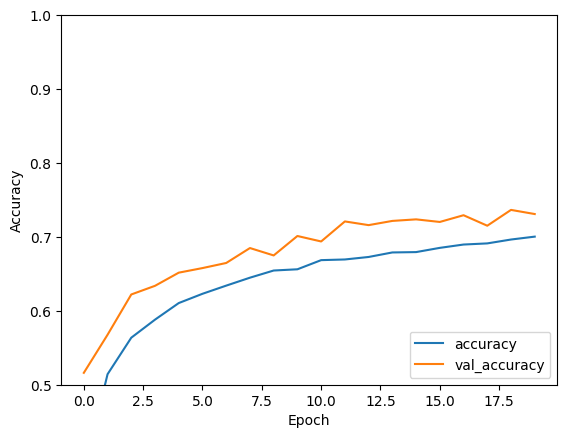

In [68]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

:

In [69]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.73089998960495
